# FMNIST

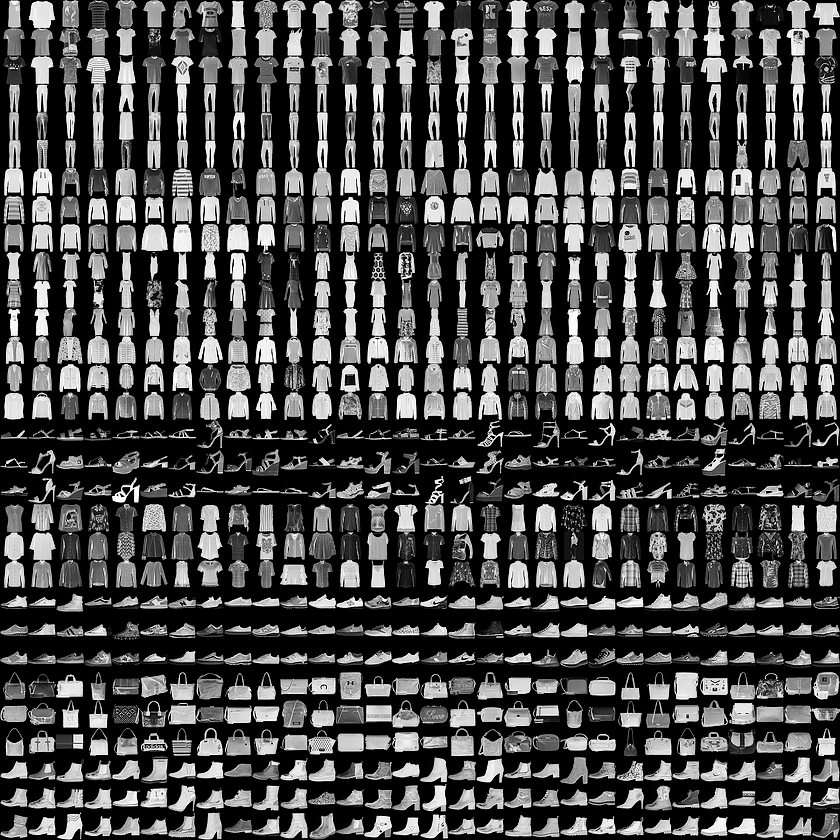

In [159]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,f1_score

#models
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [72]:
test = pd.read_csv(r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train = pd.read_csv(r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [75]:
X_train=train.iloc[:,1:].values.reshape(-1,28,28)/255
Y_train=train.iloc[:,0].values.reshape(-1,1)

In [76]:
print(X_train.shape,Y_train.shape)

(60000, 28, 28) (60000, 1)


<function matplotlib.pyplot.show(*args, **kw)>

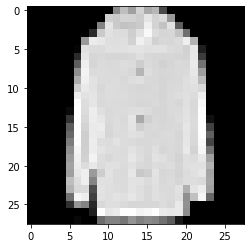

In [77]:
plt.imshow(X_train[59000], cmap = plt.get_cmap('gray'))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

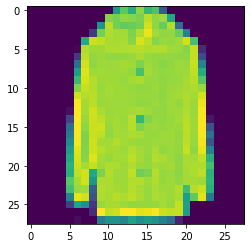

In [80]:
plt.imshow(X_train[59000])
plt.show

In [81]:
train.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56618,4,0,0,0,0,0,0,0,0,0,...,0,0,0,7,88,54,18,0,0,0
58415,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58480,6,0,0,0,0,0,0,0,0,0,...,42,18,0,0,0,0,0,0,0,0
21446,6,0,0,0,0,0,0,0,0,0,...,86,44,0,0,0,1,1,0,0,0
28733,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2291,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2839,2,0,0,0,0,0,0,0,0,0,...,0,3,0,19,192,173,72,0,0,0
52026,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59506,6,0,0,0,0,0,0,0,0,0,...,93,46,0,0,0,0,0,0,0,0


In [82]:
test.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7505,0,0,0,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
262,4,0,0,0,1,0,0,1,1,0,...,0,2,0,34,143,136,13,0,0,0
9204,3,0,0,0,0,0,0,1,1,0,...,147,163,22,0,0,0,0,0,0,0
8905,1,0,0,0,0,0,0,0,0,0,...,46,0,0,0,0,0,0,0,0,0
9076,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,86,114,62,0,0,0
4486,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5697,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1487,2,0,0,0,0,0,1,0,0,0,...,0,0,0,48,139,125,45,0,0,0
4385,6,0,0,0,0,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,0


### Let us inspect the number of samples for each category:

In [83]:
label_count = train["label"].value_counts()
total_samples = len(train)
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
         5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Boot"}
for i in range(len(label_count)):
    label = labels[label_count.index[i]]
    count = label_count.values[i]
    pct = (count / total_samples) * 100
    print(label, " :   ", count,"or", pct, "%")

Boot  :    6000 or 10.0 %
Bag  :    6000 or 10.0 %
Sneaker  :    6000 or 10.0 %
Shirt  :    6000 or 10.0 %
Sandal  :    6000 or 10.0 %
Coat  :    6000 or 10.0 %
Dress  :    6000 or 10.0 %
Pullover  :    6000 or 10.0 %
Trouser  :    6000 or 10.0 %
T-shirt/top  :    6000 or 10.0 %


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

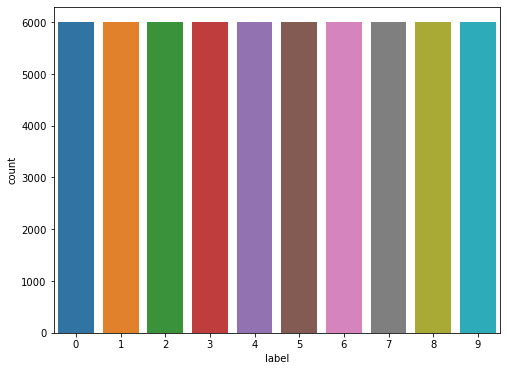

In [105]:
l = train["label"]
plt.figure(figsize = (8,6))
sns.countplot(l)
plt.xticks()

we can see that this data set is perfectly balnced!

# preprocessing of data

In [108]:
# Separate the labels from train and test dataframe
tr_labels = train["label"]
ts_labels = test["label"]

# Drop the labels column from train dataframe as well as test dataframe
train = train.drop(["label"], axis =1)
test = test.drop(["label"], axis=1)

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, tr_labels, test_size=0.2, random_state=111)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_valid))

print("Train and validation shapes: ", end=" ")
print(X_train.shape,y_train.shape,X_valid.shape, y_valid.shape)

Number of samples in the train set:  48000
Number of samples in the validation set:  12000
Train and validation shapes:  (48000, 784) (48000,) (12000, 784) (12000,)


In [109]:
# Reshape the data values
X_train = np.array(X_train.iloc[:, :]).reshape(len(X_train),784)
X_valid = np.array(X_valid.iloc[:, :]).reshape(len(X_valid),784)
X_test = np.array(test.iloc[:,:]).reshape(len(test),784)

In [110]:
# Some more preprocessing
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [111]:
# Normalization
X_train /=255.
X_valid /=255.
X_test /=255.

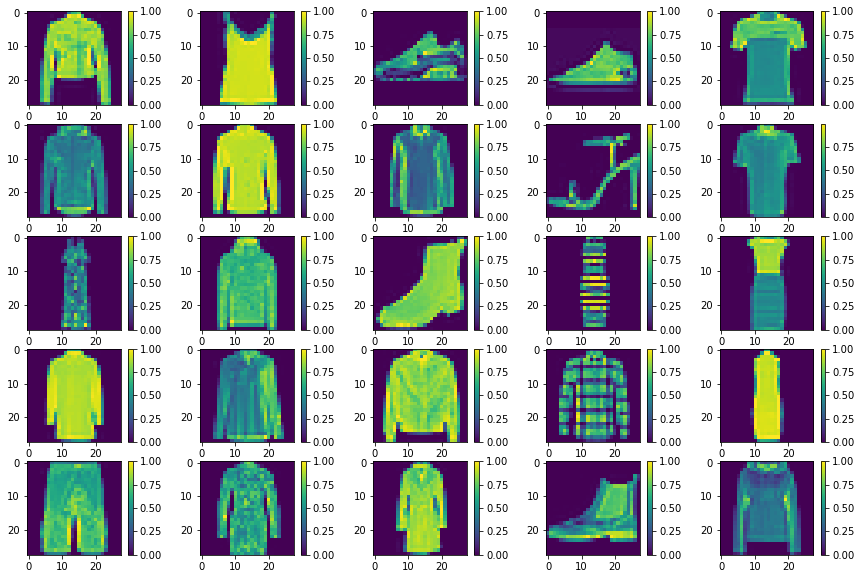

In [140]:
fig, ax = plt.subplots(nrows = 5,ncols = 5, figsize = (15,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    plt.colorbar()
plt.show()

### Modeling  (before PCA)

In [141]:
print("X_train shape:",X_train.shape ,"y_train shape:", y_train.shape)
print("X_valid shape:",X_valid.shape ,"y_valid shape:",  y_valid.shape)
print("X_test shape: ", X_test.shape)

X_train shape: (48000, 784) y_train shape: (48000,)
X_valid shape: (12000, 784) y_valid shape: (12000,)
X_test shape:  (10000, 784)


### Logistic Regression 

In [187]:
lr_b=LogisticRegression()
lr_b.fit(X_train,y_train)
lr_b_pred = lr_b.predict(X_valid)

In [188]:
lr_b_score = metrics.accuracy_score(y_valid, lr_b_pred)*100
print("Logistic Regression Algo Result : ",lr_b_score)

Logistic Regression Algo Result :  85.28333333333333


### XGBoost  
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [184]:
xgb_c = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss')
xgb_c.fit(X_train, y_train)
xgb_c_pred = xgb_c.predict(X_valid)

In [186]:
xgb_c_score = metrics.accuracy_score(y_valid, xgb_c_pred)*100
print("XGBoost Algo Result : ",xgb_c_score)

XGBoost Algo Result :  90.025


well that the BEST score yet!

## PCA:  
PCA is actually a very important tool for dimensionality reduction of large data sets. Reducing the number of components or features may cost the accuracy,but it makes the large data set simpler, easy to explore and visualize. Also, it reduces the complexity of the model which makes the algorithms run faster.

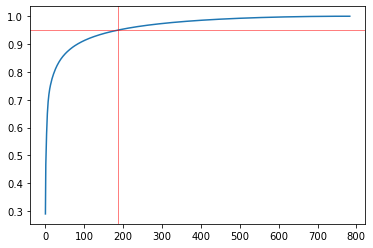

In [146]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.axhline(y=0.95, linewidth=0.5, color='r');
plt.axvline(x=187, linewidth=0.5, color='r');

<B> Let us reduce the dimensions:

In [147]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)

In [148]:
pca.n_components_

187

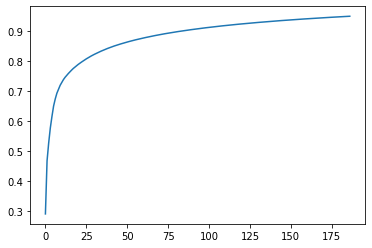

In [149]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

## Modeling:

In [150]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_valid_PCA = pd.DataFrame(X_valid_reduced)

<B> Logistic Regression

In [151]:
lr=LogisticRegression()
lr.fit(X_train_PCA,y_train)
lr_pred = lr.predict(X_valid_PCA)

In [152]:
lr_score = metrics.accuracy_score(y_valid, lr_pred)*100
print("Logistic Regression Algo Result : ",lr_score)

Logistic Regression Algo Result :  85.26666666666667


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1185
           1       0.98      0.96      0.97      1227
           2       0.76      0.73      0.74      1231
           3       0.86      0.89      0.88      1181
           4       0.72      0.78      0.74      1153
           5       0.94      0.93      0.94      1207
           6       0.63      0.58      0.60      1224
           7       0.91      0.93      0.92      1134
           8       0.95      0.94      0.95      1257
           9       0.95      0.95      0.95      1201

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



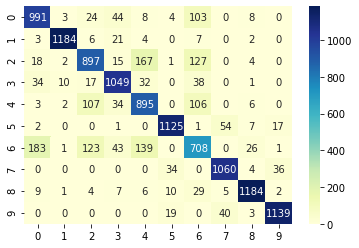

In [160]:
con_mat = confusion_matrix(y_valid, lr_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, lr_pred))

<B> Decision Tree Classifier

In [163]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_PCA, y_train)
dtc_pred = dtc.predict(X_valid_PCA)
dtc_score = metrics.accuracy_score(y_valid, dtc_pred)*100
print("Decision tree Algo Result : ", dtc_score)

Decision tree Algo Result :  75.46666666666667


              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1185
           1       0.94      0.93      0.93      1227
           2       0.62      0.60      0.61      1231
           3       0.78      0.78      0.78      1181
           4       0.58      0.61      0.60      1153
           5       0.85      0.81      0.83      1207
           6       0.49      0.50      0.49      1224
           7       0.82      0.85      0.84      1134
           8       0.88      0.85      0.87      1257
           9       0.88      0.89      0.89      1201

    accuracy                           0.75     12000
   macro avg       0.76      0.75      0.76     12000
weighted avg       0.76      0.75      0.76     12000



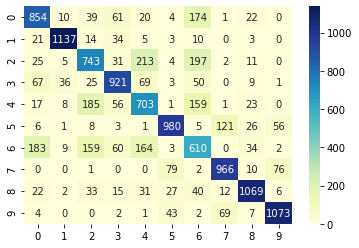

In [164]:
con_mat = confusion_matrix(y_valid, dtc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, dtc_pred))

### AdaBoost

AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

In [154]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=150,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_PCA, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=150, random_state=42)

In [155]:
ada_clf_score = ada_clf.score(X_valid_PCA, y_valid)*100
print("AdaBoost Algo Result : ",ada_clf_score)

AdaBoost Algo Result :  57.425000000000004


              precision    recall  f1-score   support

           0       0.68      0.31      0.43      1185
           1       0.92      0.24      0.38      1227
           2       0.50      0.43      0.46      1231
           3       0.37      0.89      0.52      1181
           4       0.45      0.68      0.54      1153
           5       0.61      0.79      0.69      1207
           6       0.34      0.15      0.21      1224
           7       0.72      0.53      0.61      1134
           8       0.83      0.91      0.86      1257
           9       0.88      0.80      0.84      1201

    accuracy                           0.57     12000
   macro avg       0.63      0.57      0.55     12000
weighted avg       0.63      0.57      0.56     12000



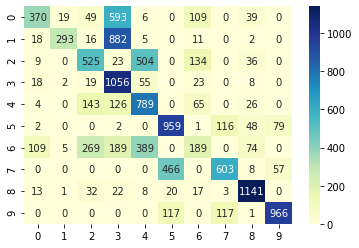

In [165]:
ada_pred = ada_clf.predict(X_valid_PCA)
con_mat = confusion_matrix(y_valid, ada_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, ada_pred))

we got very bad score, let us try the XGBoost model:

### XGBoost

In [156]:
xgb_reg = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss')
xgb_reg.fit(X_train_PCA, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [157]:
xgb_reg_score = xgb_reg.score(X_valid_PCA, y_valid)*100
print("XGBoost Algo Result : ",xgb_reg_score)

XGBoost Algo Result :  88.45833333333334


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1185
           1       0.99      0.96      0.98      1227
           2       0.81      0.79      0.80      1231
           3       0.90      0.91      0.91      1181
           4       0.78      0.83      0.80      1153
           5       0.96      0.95      0.96      1207
           6       0.73      0.68      0.70      1224
           7       0.94      0.94      0.94      1134
           8       0.96      0.96      0.96      1257
           9       0.94      0.96      0.95      1201

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



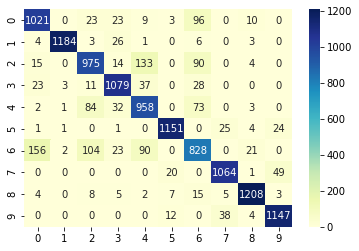

In [166]:
xgb_pred = xgb_reg.predict(X_valid_PCA)
con_mat = confusion_matrix(y_valid, xgb_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, xgb_pred))

BETTER!

# results:  
after training the train set let us try our models on the test set and see the results

In [189]:
score_list = [lr_b_score,xgb_c_score]
score_df = pd.DataFrame(score_list, index = ['logistic regression','xgboost'], columns = ['score - before PCA'])
score_df

,score - before PCA
logistic regression,85.283333
xgboost,90.025000


In [190]:
score_list_PCA = [lr_score,dtc_score,ada_clf_score,xgb_reg_score]
score_PCA_df = pd.DataFrame(score_list_PCA, index = ['logistic regression', 'decision tree','ada boost','xgboost'], columns = ['score'])
score_PCA_df

,score
logistic regression,85.266667
decision tree,75.466667
ada boost,57.425000
xgboost,88.458333


### As we can see the best score was with the XGBoost model.    
<B> Now let us run over the test set with the xgboost model:

In [191]:
X_test_reduced = pca.transform(X_test)

<B> before PCA:

In [193]:
#logistic regression
lr_b_pred = lr_b.predict(X_test)
final_lr_b = accuracy_score(ts_labels, lr_b_pred)*100
print(f'logistic regression score: {final_lr_b}')

logistic regression score: 85.69


In [194]:
#XGBoost 
xgb_c_pred = xgb_c.predict(X_test)
final_xgb_c = accuracy_score(ts_labels, xgb_c_pred)*100
print(f'XGBoost score: {final_xgb_c}')

XGBoost score: 90.61


<B> after PCA

In [170]:
#logistic regression
lr_pred = lr.predict(X_test_reduced)
final_lr = accuracy_score(ts_labels, lr_pred)*100
print(f'logistic regression score: {final_lr}')

logistic regression score: 85.35000000000001


In [173]:
#decision tree
dtc_pred = dtc.predict(X_test_reduced)
final_dtc = accuracy_score(ts_labels, dtc_pred)*100
print(f'decision tree score: {final_dtc}')

decision tree score: 75.88000000000001


In [174]:
#ada boost
ada_clf_pred = ada_clf.predict(X_test_reduced)
final_ada_clf =  metrics.accuracy_score(ts_labels, ada_clf_pred)*100
print(f'ada boost score: {final_ada_clf}')

ada boost score: 57.93000000000001


In [176]:
#XGBoost 
xgb_pred = xgb_reg.predict(X_test_reduced)
final_xgb = accuracy_score(ts_labels, xgb_pred)*100
print(f'XGBoost score: {final_xgb}')

XGBoost score: 88.44


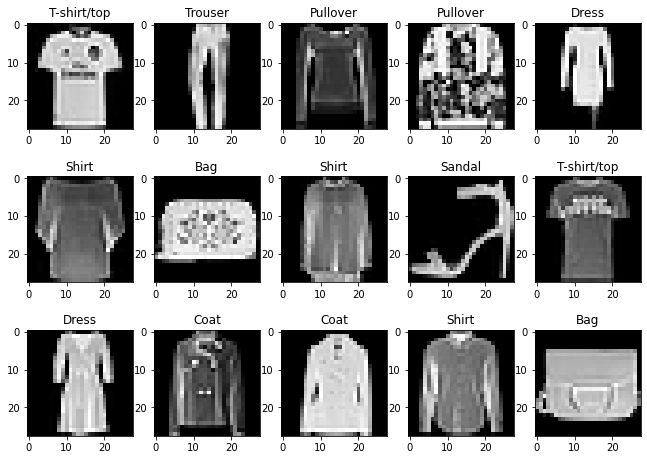

In [196]:
fig, ax = plt.subplots(nrows = 3,ncols = 5, figsize = (11,8))
for i in range(15):
    img = X_test[i].reshape(28,28)
    ax[i//5, i%5].imshow(img, cmap = plt.get_cmap('gray'))
    ax[i//5, i%5].set_title(labels[xgb_reg.predict(pca.transform(X_test))[i]])
plt.show()    

# In conclusion we have a 90.61% accuracy by the XGBoost model before the PCA, since we would like to make the model compact we would rather use the XGBoost model after the PCA with 88.44% accuracy.